In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021121350.html')
#A

In [3]:
# choosing the data that we will use 
A1=A[11]
#A1

In [4]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[365:514] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header
A2 = A2.reset_index(drop=True) #resetting index
#A2

In [5]:
Indicator = A2.copy() #making acopy of the new dataframe
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,31 Jan 2020,827,784,805,821,3540064,0.00,0.00,0.00,-151.80,-0.66,0.00
1,30 Jan 2020,872,814,858,825,2086738,0.00,0.00,0.00,-151.06,-0.66,0.00
2,29 Jan 2020,878,775,800,855,2452306,0.00,0.00,0.00,-145.76,-0.69,0.00
3,28 Jan 2020,1260,1181,1260,1200,2247292,0.00,0.00,0.00,-144.75,-0.69,0.00
4,27 Jan 2020,1296,1236,1236,1260,1634503,0.00,0.00,0.00,-137.86,-0.73,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
144,05 Jul 2019,1965,1900,1910,1942,369715,0.00,0.00,0.00,-107.72,-0.93,0.00
145,04 Jul 2019,1917,1835,1835,1910,320730,0.00,0.00,0.00,-109.53,-0.91,0.00
146,03 Jul 2019,1884,1825,1845,1863,345884,0.00,0.00,0.00,-112.29,-0.89,0.00
147,02 Jul 2019,1930,1846,1875,1850,472473,0.00,0.00,0.00,-113.08,-0.88,0.00


In [6]:
Indicator['Date'] = pd.to_datetime(Indicator.Date) #changing date format
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,2020-01-31,827,784,805,821,3540064,0.00,0.00,0.00,-151.80,-0.66,0.00
1,2020-01-30,872,814,858,825,2086738,0.00,0.00,0.00,-151.06,-0.66,0.00
2,2020-01-29,878,775,800,855,2452306,0.00,0.00,0.00,-145.76,-0.69,0.00
3,2020-01-28,1260,1181,1260,1200,2247292,0.00,0.00,0.00,-144.75,-0.69,0.00
4,2020-01-27,1296,1236,1236,1260,1634503,0.00,0.00,0.00,-137.86,-0.73,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,1965,1900,1910,1942,369715,0.00,0.00,0.00,-107.72,-0.93,0.00
145,2019-07-04,1917,1835,1835,1910,320730,0.00,0.00,0.00,-109.53,-0.91,0.00
146,2019-07-03,1884,1825,1845,1863,345884,0.00,0.00,0.00,-112.29,-0.89,0.00
147,2019-07-02,1930,1846,1875,1850,472473,0.00,0.00,0.00,-113.08,-0.88,0.00


In [7]:
#changing data type to float for easy calculation
Indicator['High']=Indicator.High.astype('float')
Indicator['Close']=Indicator.Close.astype('float')
Indicator['Low']=Indicator.Low.astype('float')
Indicator['Open']=Indicator.Open.astype('float')

In [8]:
#deleting columns not neccessary fot indicator calculation
del Indicator['Volume'],Indicator['TotalDistributionYield'], Indicator['InterestYield'], Indicator['CapitalPaymentYield'], Indicator['EY'], Indicator['DY'], Indicator['P/E']
#Indicator

In [9]:
#descriptive statistics
Indicator["Close"].describe()

count     149.000000
mean     1514.436242
std       203.137662
min       821.000000
25%      1375.000000
50%      1502.000000
75%      1695.000000
max      1942.000000
Name: Close, dtype: float64

In [10]:
def RSI(value):
    '''
    The function calculates the relative strength index parameters 
    to be used to calculate 14_day rsi values
    '''
    up = value[value>0].mean()
    down = -value[value<0].mean()
    return (100 * up / (up + down))

Indicator['Direction'] = (Indicator['Close'] - Indicator['Close'].shift(1)) #adding momentum
Indicator['RSI_14D'] = Indicator['Direction'].rolling(center=False, window=14).apply(RSI) #14D RSI

In [12]:
l = []
for i in range (len(Indicator)):
    if Indicator['RSI_14D'][i] >= 28 and Indicator['RSI_14D'][i] <= 30:#values in this range satisfy a buy condition
        l.append(1) #buy
    elif Indicator['RSI_14D'][i] >= 31 and Indicator['RSI_14D'][i] <= 69:#values in this range satisfy a hold condition
        l.append(2) #hold
    elif Indicator['RSI_14D'][i] >= 70:#values in this range satisfy a sell condition
        l.append(3)#sell
    else:
        l.append(2) #hold signal
Indicator['RSI_sig'] = l

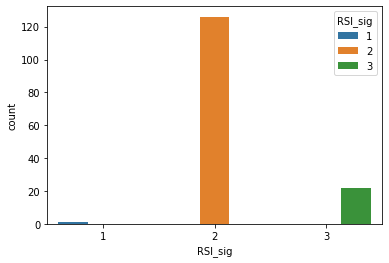

2    126
3     22
1      1
Name: RSI_sig, dtype: int64

In [13]:
sns.countplot(x = 'RSI_sig', data=pd.DataFrame(Indicator), hue='RSI_sig')#plots frequency of signals
plt.savefig("brait_rsicount")
plt.show()
Indicator['RSI_sig'].value_counts() #counts according to signal code 

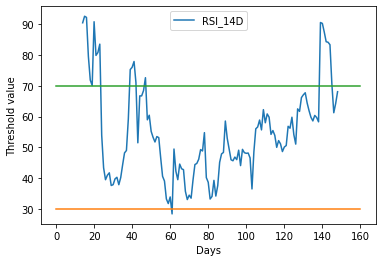

In [14]:
#graphical representation of indicator
r = Indicator['RSI_14D']
h = [0,160]
b = [30,30]
f = plt.plot(r, label = 'RSI_14D')
e = [70,70]
g = plt.plot(h,b,h,e) + f
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("brait_rsi")
plt.show(g)

In [15]:
n=21
Indicator['STOK'] = ((Indicator['Close'] - Indicator['Low'].rolling(window=n,center=False).mean()) /
                     (Indicator['High'].rolling(window=n, center=False).max() - 
                      Indicator['Low'].rolling(window=n, center=False).min())) * 100 #D% stochastic
Indicator['STOD'] = Indicator['STOK'].rolling(window = 7, center=False).mean()  #K% stochastic 

In [16]:
m = []
for i in range (len(Indicator)):
    if Indicator['STOK'][i] >= 28 and Indicator['STOK'][i]<=30:#values in this range satisfy a buy condition
        m.append(1) #buy
    elif Indicator['STOK'][i] > 30 and Indicator['STOK'][i] < 70:#values in this range satisfy a hold condition
        m.append(2) #sell    
    elif Indicator['STOK'][i] >= 70:#values in this range satisfy a sell condition
        m.append(3) #sell
    else:
        m.append(2) #hold
Indicator['STO_sig'] = m

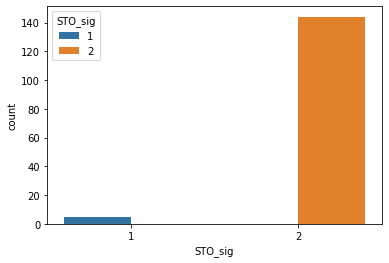

2    144
1      5
Name: STO_sig, dtype: int64

In [17]:
sns.countplot(x = 'STO_sig', data=pd.DataFrame(Indicator), hue='STO_sig')#plots frequency of signals
plt.savefig("brait_stocount")
plt.show()
Indicator['STO_sig'].value_counts()#counts frequency of signals

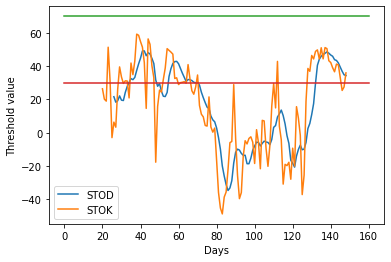

In [18]:
#graphical representation of indicator
t = Indicator['STOD']
j = Indicator['STOK']
u = plt.plot(t, label = 'STOD')
s = plt.plot(j, label = 'STOK')
h = [0,160]
b = [30,30]
e = [70,70]
g = plt.plot(h,e,h,b) + u + s
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("brait_sto")
plt.show()

In [19]:
Indicator['EMA_10'] = Indicator['Close'].ewm(span=10,adjust=False,min_periods=1).mean() #10day exponential ma
Indicator['EMA_30'] = Indicator['Close'].ewm(span=20,adjust=False,min_periods=1).mean() #30day exponential ma
Indicator['EMA_90'] = Indicator['Close'].ewm(span=90,adjust=False,min_periods=1).mean() #90day exponential ma

In [20]:
# append 1 for a buy, 0 for a sell and 2 for hold and NaN
n = []
for i in range (len(Indicator)):
    if Indicator['EMA_10'][i] < Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a buy condition
        n.append(1) #buy
    elif Indicator['EMA_10'][i] > Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a hold condition
        n.append(3) #sell
    elif Indicator['EMA_10'][i] == Indicator['EMA_30'][i] == Indicator['EMA_90'][i]:#values in this range satisfy a sell condition
        n.append(2)  #hold      
    else:
        n.append(2)#hold
Indicator['EMA_sig'] = n     

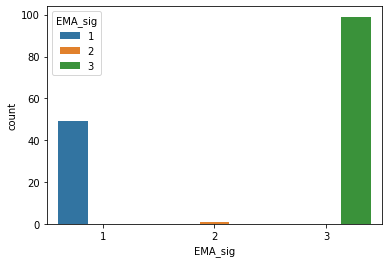

3    99
1    49
2     1
Name: EMA_sig, dtype: int64

In [21]:
sns.countplot(x = 'EMA_sig', data=pd.DataFrame(Indicator), hue='EMA_sig')#plots frequency of signals
plt.savefig("brait_emacount")
plt.show()
Indicator['EMA_sig'].value_counts()#counts exact frequency of signals 

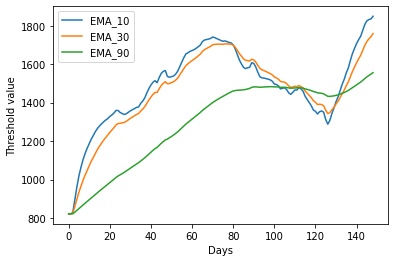

In [22]:
# buy if 50EMA line cuts the other two EMA lines from above and moves below both the EMAs
# sell if 50EMA line cuts the other two EMA lines from below and moves above both the EMAs
a = Indicator['EMA_10'] #50 day exponential moving average
b = Indicator['EMA_30'] #100 day exponential moving average
c = Indicator['EMA_90'] #200 day exponential moving average
d = plt.plot(a, label = 'EMA_10' ) + plt.plot(b, label = 'EMA_30') + plt.plot(c, label = 'EMA_90')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("brait_ema")
plt.show(d)

In [23]:
Indicator['26_ema'] = Indicator['Close'].ewm(span=26,adjust=True,ignore_na=False).mean() #26day ema
Indicator['12_ema'] = Indicator['Close'].ewm(span=12,adjust=True,ignore_na=False).mean() #12day ema
Indicator['MACD'] = Indicator['12_ema'] - Indicator['26_ema'] #macd
Indicator['9EMA_MACD'] = Indicator['MACD'].ewm(span=9,adjust=True,ignore_na=False).mean() #9daymacd_ema
#Indicator

In [24]:
f = []
for i in range (len(Indicator)):
    if Indicator['MACD'][i] > Indicator['9EMA_MACD'][i]:#values in this range satisfy a buy condition
        f.append(1) #buy
    elif Indicator['MACD'][i] < Indicator['9EMA_MACD'][i]:#values in this range satisfy a sell condition
        f.append(3) #sell     
    else:
        f.append(2)#hold
Indicator['MACD_sig'] = f 

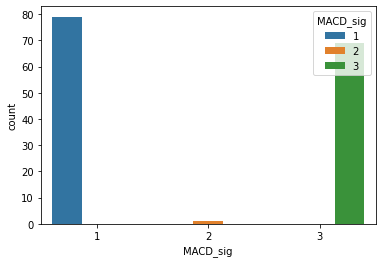

1    79
3    69
2     1
Name: MACD_sig, dtype: int64

In [25]:
sns.countplot(x = 'MACD_sig', data=pd.DataFrame(Indicator), hue='MACD_sig')#plots frequency of signals
plt.savefig("brait_macdcount")
plt.show()
Indicator['MACD_sig'].value_counts()#counts the exact frequency of each signal

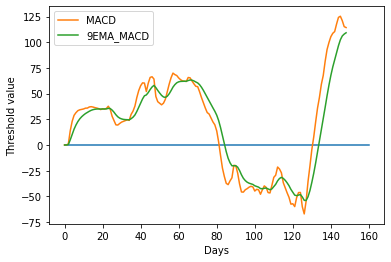

In [26]:
#graphical representation of indicator
q = Indicator['9EMA_MACD']
e = Indicator['MACD']
z = [0,160]
x = [0,0]
r = plt.plot(z,x)+ plt.plot(e, label = 'MACD') +plt.plot(q, label = '9EMA_MACD')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("brait_macd")
plt.show(r)

In [27]:
#Indicator

In [28]:
#change from dataframe to numpy for easy adding
new1 = Indicator['RSI_sig'].to_numpy()
new2 = Indicator['MACD_sig'].to_numpy()
new3 = Indicator['EMA_sig'].to_numpy()
new4 = Indicator['STO_sig'].to_numpy()

In [29]:
b = []
for i in range (len(new2)):
    if new1[i] + new2[i] + new3[i] + new4[i] <= 6:#values in this range satisfy a buy decision
        b.append(1)
    elif new1[i] + new2[i] + new3[i] + new4[i] >=10:#values in this range satisfy a sell decision
        b.append(3)
    else:
        b.append(2) #values in this range satisfy a hold decision
new5 = pd.Series(b)  
#new5

In [30]:
Indicator['Decision'] = new5
Indicator

,Date,High,Low,Open,Close,Direction,RSI_14D,RSI_sig,STOK,STOD,...,EMA_10,EMA_30,EMA_90,EMA_sig,26_ema,12_ema,MACD,9EMA_MACD,MACD_sig,Decision
0,2020-01-31,827.0,784.0,805.0,821.0,NaN,NaN,2,NaN,NaN,...,821.000000,821.000000,821.000000,2,821.000000,821.000000,0.000000,0.000000,2,2
1,2020-01-30,872.0,814.0,858.0,825.0,4.0,NaN,2,NaN,NaN,...,821.727273,821.380952,821.087912,3,823.076923,823.166667,0.089744,0.049858,1,2
2,2020-01-29,878.0,775.0,800.0,855.0,30.0,NaN,2,NaN,NaN,...,827.776860,824.582766,821.833233,3,834.546575,835.591224,1.044649,0.457559,1,2
3,2020-01-28,1260.0,1181.0,1260.0,1200.0,345.0,NaN,2,NaN,NaN,...,895.453794,860.336789,830.144590,3,936.711382,950.620833,13.909451,5.014433,1,2
4,2020-01-27,1296.0,1236.0,1236.0,1260.0,60.0,NaN,2,NaN,NaN,...,961.734922,898.399952,839.591962,3,1011.683346,1034.678047,22.994701,10.363156,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,1965.0,1900.0,1910.0,1942.0,26.0,83.311081,3,40.800742,41.955539,...,1806.498671,1697.799386,1525.371104,3,1656.448748,1780.717303,124.268555,96.719676,1,2
145,2019-07-04,1917.0,1835.0,1835.0,1910.0,-32.0,70.588235,3,33.126057,39.465730,...,1825.317094,1718.008968,1533.824486,3,1675.230570,1800.606949,125.376379,102.451016,1,2
146,2019-07-03,1884.0,1825.0,1845.0,1863.0,-47.0,61.244019,2,25.402661,36.915401,...,1832.168532,1731.817638,1541.059113,3,1689.139586,1810.205880,121.066293,106.174072,1,2
147,2019-07-02,1930.0,1846.0,1875.0,1850.0,-13.0,64.245810,2,27.490655,34.817734,...,1835.410617,1743.073101,1547.849023,3,1701.055307,1816.328052,115.272745,107.993806,1,2


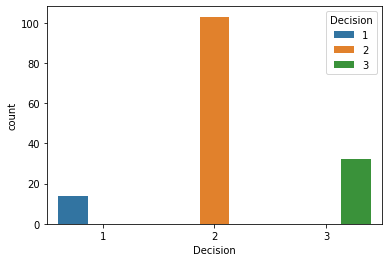

2    103
3     32
1     14
Name: Decision, dtype: int64

In [31]:
sns.countplot(x = 'Decision', data=pd.DataFrame(Indicator), hue='Decision')#plots frequency of signals
plt.savefig("brait_dec")
plt.show()
Indicator['Decision'].value_counts()# counts frequency

In [32]:
Indicator['Decision'].value_counts(normalize=True) * 100 #expresses frequency as a percentage

2    69.127517
3    21.476510
1     9.395973
Name: Decision, dtype: float64